In [1]:
# Step 1: Exploring Data
import pandas as pd
# Load the dataset
evdata = pd.read_csv("EVdata.csv")

In [2]:
# Display column names, dimensions and the first 3 rows of the dataset
evdata = evdata.dropna()
print(evdata.columns)
print(evdata.shape)
print(evdata.head(3))

Index(['Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain',
       'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro'],
      dtype='object')
(103, 14)
         Brand                          Model  AccelSec  TopSpeed_KmH  \
0       Tesla   Model 3 Long Range Dual Motor       4.6           233   
1  Volkswagen                       ID.3 Pure      10.0           160   
2    Polestar                               2       4.7           210   

   Range_Km  Efficiency_WhKm  FastCharge_KmH RapidCharge PowerTrain  \
0       450              161             940         Yes        AWD   
1       270              167             250          No        RWD   
2       400              181             620         Yes        AWD   

     PlugType  BodyStyle Segment  Seats  PriceEuro  
0  Type 2 CCS      Sedan       D      5      55480  
1  Type 2 CCS  Hatchback       C      5      30000  
2  Type 2 CCS   Liftback   

In [3]:
# Remove column Segement
evdata = evdata.drop(columns=['Segment'])
print(evdata.columns)
print(evdata.shape)
print(evdata.head(3))

Index(['Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain',
       'PlugType', 'BodyStyle', 'Seats', 'PriceEuro'],
      dtype='object')
(103, 13)
         Brand                          Model  AccelSec  TopSpeed_KmH  \
0       Tesla   Model 3 Long Range Dual Motor       4.6           233   
1  Volkswagen                       ID.3 Pure      10.0           160   
2    Polestar                               2       4.7           210   

   Range_Km  Efficiency_WhKm  FastCharge_KmH RapidCharge PowerTrain  \
0       450              161             940         Yes        AWD   
1       270              167             250          No        RWD   
2       400              181             620         Yes        AWD   

     PlugType  BodyStyle  Seats  PriceEuro  
0  Type 2 CCS      Sedan      5      55480  
1  Type 2 CCS  Hatchback      5      30000  
2  Type 2 CCS   Liftback      5      56440  


In [4]:
# Preprocessing the data
import numpy as np
from sklearn.preprocessing import LabelEncoder
proc_evdata = evdata.iloc[:, 0:11].apply(lambda x: LabelEncoder().fit_transform(x))
proc_evdatax = proc_evdata.values
np.round(np.mean(proc_evdatax, axis=0), 2)

array([18.06, 50.86, 28.08, 10.5 , 24.85, 22.01, 20.63,  0.75,  0.84,
        1.92,  4.08])

In [5]:
# Perform Principal Components Analysis (PCA)
from sklearn.decomposition import PCA
pca = PCA()
evdata_pca = pca.fit_transform(proc_evdata)
pca_evdf = pd.DataFrame(evdata_pca, columns=proc_evdata.columns)
print(pca_evdf)
summary = pd.DataFrame(index=["PC" + str(i) for i in range(1, len(pca.components_)+1)])
summary["Standard deviation"] = np.sqrt(pca.explained_variance_).round(5)
summary["Proportion of Variance"] = pca.explained_variance_ratio_.round(5)
summary["Cumulative Proportion"] = np.cumsum(pca.explained_variance_ratio_).round(5)
print(summary)

         Brand      Model   AccelSec  TopSpeed_KmH   Range_Km  \
0    -6.917034  28.774254 -32.095144      3.813377   1.260340   
1   -20.279798 -26.831449  -7.525790     -7.169385   1.870479   
2   -50.760895  23.135751  -6.300403      6.615673  -5.067851   
3    52.217435  11.985038   6.715855      4.270172   6.099527   
4    28.033336 -33.649094   2.531463      3.956473  -6.711299   
..         ...        ...        ...           ...        ...   
98  -44.589634  -0.013991   5.989503      2.232341  -0.289561   
99   46.491478  25.454237  20.925603     -0.366782  -7.005036   
100 -42.164599   6.905736   6.280780      2.134512  -8.877028   
101 -39.942829  19.680338  17.783613     -3.870829  -4.938794   
102  -6.122434  15.647116  24.279779      5.252390  10.448165   

     Efficiency_WhKm  FastCharge_KmH  RapidCharge  PowerTrain  PlugType  \
0          -6.267509       -1.349399    -2.436007    0.539400  0.172212   
1           2.025500       -3.064142     4.074184   -0.581242  0.3313

In [6]:
print("Standard deviations: ")
print(np.round(np.sqrt(pca.explained_variance_), 1))
print("\nRotation (n x k) = (11 x 11):")
loading = pd.DataFrame(pca.components_.T, index=evdata.columns[:11], columns=[f'PC{i}' for i in range(1, len(pca.components_)+1)])
loading *= -1
loading = loading.round(2)
print(loading)

Standard deviations: 
[30.1 24.3 12.5  8.6  7.1  5.5  2.4  1.7  0.6  0.4  0.3]

Rotation (n x k) = (11 x 11):
                  PC1   PC2   PC3   PC4   PC5   PC6   PC7   PC8   PC9  PC10  \
Brand            0.16 -0.00  0.46  0.86  0.02 -0.13  0.02  0.04  0.00  0.01   
Model           -0.99  0.01  0.09  0.13 -0.04 -0.03 -0.02 -0.01 -0.00  0.00   
AccelSec         0.03  0.55 -0.10  0.10 -0.73  0.23  0.23 -0.20 -0.03  0.01   
TopSpeed_KmH    -0.01 -0.22  0.07 -0.04  0.19 -0.05  0.69 -0.65  0.00  0.02   
Range_Km         0.03 -0.47  0.17 -0.17 -0.61 -0.59 -0.03  0.02  0.01 -0.00   
Efficiency_WhKm -0.02 -0.37 -0.81  0.44 -0.10  0.03 -0.02 -0.04  0.01  0.01   
FastCharge_KmH  -0.00 -0.53  0.28 -0.03 -0.23  0.76 -0.07  0.00 -0.01 -0.00   
RapidCharge      0.00 -0.00  0.00 -0.01  0.00 -0.00  0.00  0.02 -0.14  0.92   
PowerTrain       0.00  0.02  0.01 -0.00 -0.02  0.02 -0.02 -0.03  0.99  0.13   
PlugType        -0.00 -0.00  0.00 -0.02  0.00  0.00 -0.02  0.03 -0.00  0.36   
BodyStyle       -0.02

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


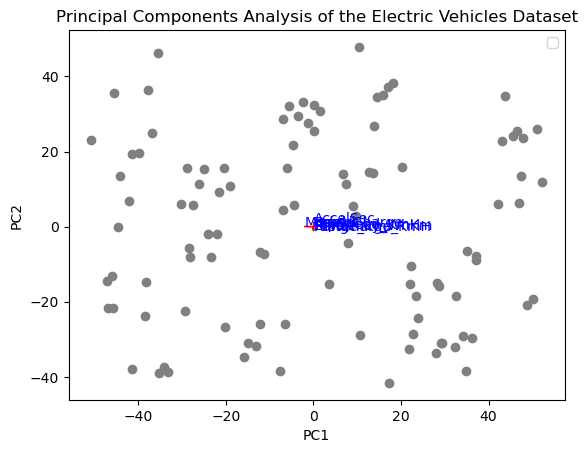

In [7]:
# Visualizing PCA loadings
import matplotlib.pyplot as plt
plt.scatter(evdata_pca[:, 0], evdata_pca[:, 1], color="grey")
scale = 2
for i, column_name in enumerate(evdata.columns[0:8]):
    plt.arrow(0, 0, -pca.components_[0, i]*scale, -pca.components_[1, i]*scale,
              head_width=0.08, head_length=0.08, fc='red', ec='red')
    plt.text(-pca.components_[0, i] * 2, -pca.components_[1, i] * 2, column_name, color='blue')

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Principal Components Analysis of the Electric Vehicles Dataset")
plt.legend()
plt.show()

In [8]:
# Step 2: Extracting Segments
# 2.1 Using k-Means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
np.random.seed(100)
k_values = range(1, 12)
inertia_values = []
k_result = []
silhouette_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=100)
    md_k4 = kmeans.fit(pca_evdf)
    labels = kmeans.predict(pca_evdf)
    #silhouette_score_ = silhouette_score(pca_evdf, labels)
    inertia_values.append(kmeans.inertia_)
    #silhouette_scores.append(silhouette_score_)
    k_result.append(labels)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

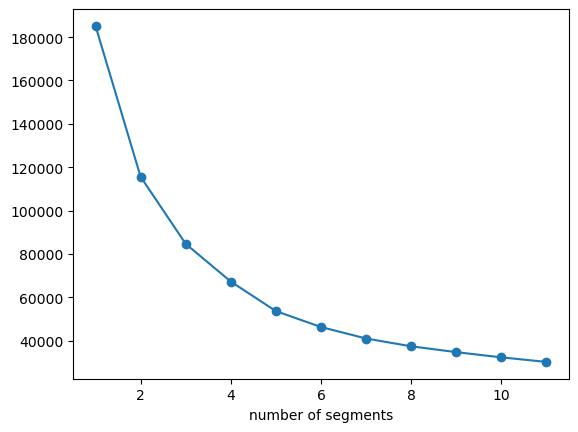

In [9]:
# Plot for the Electric Vehicles Dataset
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel("number of segments")
plt.show()

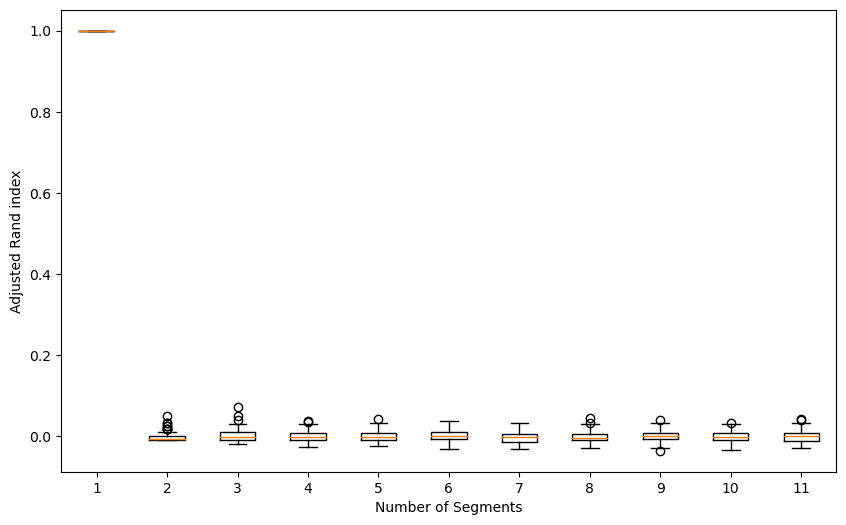

In [10]:
# Box Plot for Global stability of k-means segmentation solutions of the Electric Vehicles Dataset.
from sklearn.metrics import adjusted_rand_score
np.random.seed(100)
nboot = 100
ariscore = []

for labels in k_result:
    ariboot = []
    for _ in range(nboot):
        random_sample = np.random.choice(labels, size=len(labels), replace=True)
        ari = adjusted_rand_score(labels, random_sample)
        ariboot.append(ari)
    ariscore.append(ariboot)
plt.figure(figsize=(10, 6))
plt.boxplot(ariscore, labels=[str(k) for k in k_values], showfliers=True)
plt.xlabel('Number of Segments')
plt.ylabel('Adjusted Rand index')
plt.show()

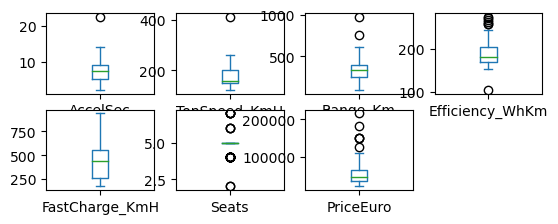

In [11]:
# Plot of each individual variable
evdata.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False)
plt.show()

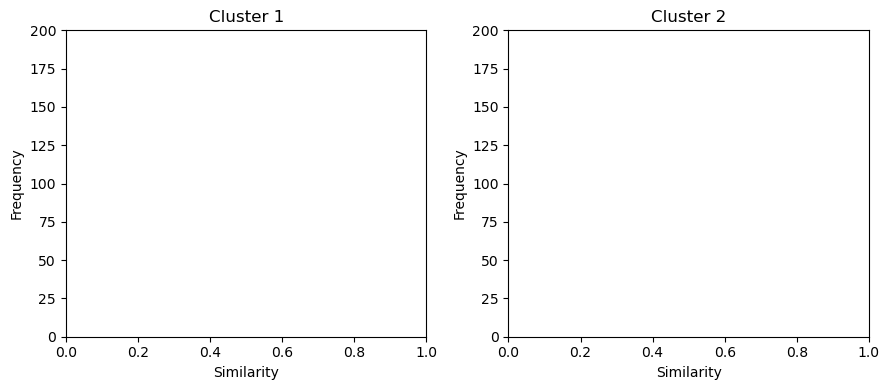

In [12]:
# Histogram of the k-means solution for the Electric Vehicles Dataset
range_values = (0, 1)
num_bins = 10
max_frequency = 200
fig, axis = plt.subplots(1, 2, figsize=(9, 4))
for i in range(1, 3):
    cluster_i_data = proc_evdata[labels == i]
    similarities = cluster_i_data.mean(axis=1)
    col = i - 1
    axis[col].hist(similarities, bins=num_bins, range=range_values)
    axis[col].set_xlabel('Similarity')
    axis[col].set_ylabel('Frequency')
    axis[col].set_title(f'Cluster {i}')
    axis[col].set_xlim(range_values)
    axis[col].set_ylim(0, max_frequency)
    axis[col].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
plt.tight_layout()
plt.show()

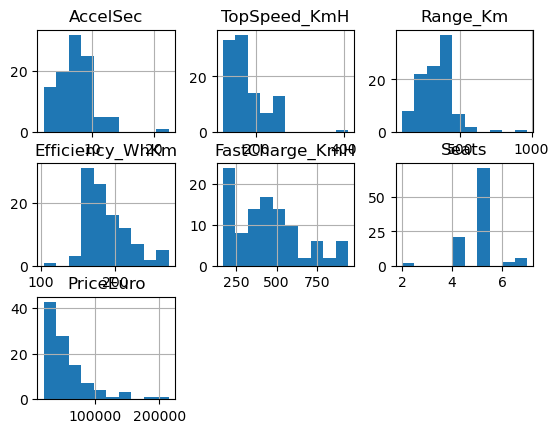

In [13]:
# Histogram
evdata.hist()
plt.show()

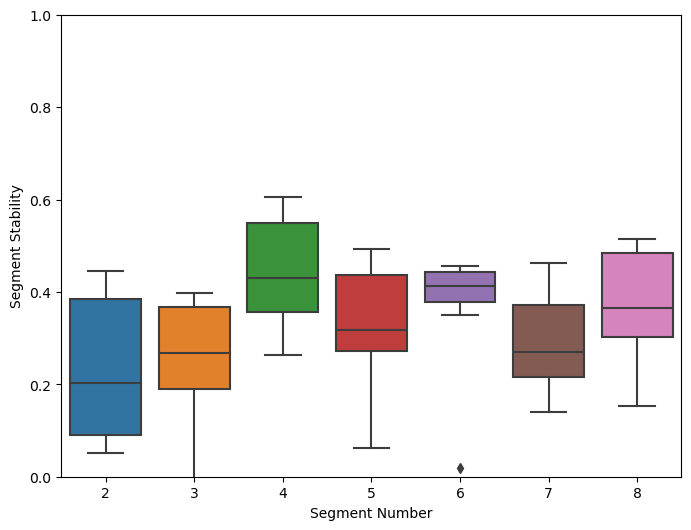

In [14]:
# Segment level stability within solutions (SLSW ) plot for the Electric Vehicles Dataset.
import seaborn as sns
silhouette_scores = silhouette_samples(proc_evdata, labels, metric='euclidean')
data = {'Segment': labels, 'Silhouette Score': silhouette_scores}
df_silhouette = pd.DataFrame(data)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Segment', y='Silhouette Score', data=df_silhouette, order=range(2, 9))
plt.xlabel('Segment Number')
plt.ylabel('Segment Stability')
plt.ylim(0, 1)
plt.show()

In [15]:
# 2.2 Using Mixtures of Distributions
# Perform Gaussian Mixture Model clustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import confusion_matrix
gausmix = GaussianMixture(n_components=4, covariance_type='full', random_state=100)
gausmix.fit(pca_evdf)
clusterassignments = gausmix.predict(pca_evdf)
model = KMeans(n_clusters=4, n_init=10, random_state=0)
model.fit(pca_evdf)
labels = model.predict(pca_evdf)
cnmatrix = confusion_matrix(labels, clusterassignments)

print("Accuracy using Confusion Matrix:")
print(cnmatrix)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Accuracy using Confusion Matrix:
[[ 0  0  0 23]
 [ 1  0 19  4]
 [ 0 17  1  7]
 [17  0  2 12]]


In [16]:
# 2.3 Using Mixtures of Regression Models
# Reverse the frequency table
efficiencycounts = evdata['Efficiency_WhKm'].value_counts().sort_index(ascending=False)
print(efficiencycounts)

273    1
270    1
267    1
261    1
258    1
256    1
244    1
238    1
237    1
232    2
231    1
228    1
223    1
222    1
219    1
217    1
216    2
215    1
211    1
209    1
207    1
206    3
200    3
198    1
197    2
195    1
194    3
193    5
191    1
188    3
184    1
183    2
181    3
180    4
179    1
178    2
177    1
176    3
175    3
173    2
172    1
171    4
170    1
168    6
167    4
166    4
165    2
164    4
161    3
160    1
156    2
154    1
153    2
104    1
Name: Efficiency_WhKm, dtype: int64


In [17]:
evdata['Efficiency_WhKm_n'] = 6 - pd.to_numeric(evdata['Efficiency_WhKm'], errors='coerce')
efficiencycounts = evdata['Efficiency_WhKm_n'].value_counts().sort_index(ascending=True)
print(efficiencycounts)

-267    1
-264    1
-261    1
-255    1
-252    1
-250    1
-238    1
-232    1
-231    1
-226    2
-225    1
-222    1
-217    1
-216    1
-213    1
-211    1
-210    2
-209    1
-205    1
-203    1
-201    1
-200    3
-194    3
-192    1
-191    2
-189    1
-188    3
-187    5
-185    1
-182    3
-178    1
-177    2
-175    3
-174    4
-173    1
-172    2
-171    1
-170    3
-169    3
-167    2
-166    1
-165    4
-164    1
-162    6
-161    4
-160    4
-159    2
-158    4
-155    3
-154    1
-150    2
-148    1
-147    2
-98     1
Name: Efficiency_WhKm_n, dtype: int64


In [18]:
import statsmodels.formula.api as smf
manualformula = 'Efficiency_WhKm_n ~ Var1 + Var2 + Var3 + Var4 + Var5 + Var6 + Var7 + Var8 + Var9 + Var10 + Var11'
automatedformula = 'Efficiency_WhKm_n ~ ' + ' + '.join(evdata.columns[0:11])
automatedformula = smf.ols(automatedformula, data=evdata).fit()
print(automatedformula.model.formula)

Efficiency_WhKm_n ~ Brand + Model + AccelSec + TopSpeed_KmH + Range_Km + Efficiency_WhKm + FastCharge_KmH + RapidCharge + PowerTrain + PlugType + BodyStyle


In [19]:
# Perform logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=100)
logreg.fit(proc_evdata, labels)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=100)

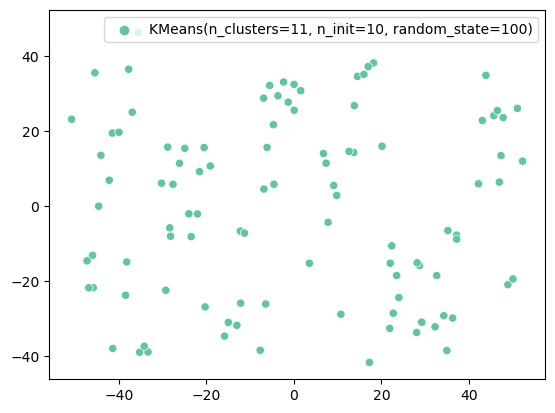

In [20]:
# Visualize the clustering results
sns.scatterplot(x=evdata_pca[:, 0], y=evdata_pca[:, 1], hue=md_k4, palette="Set2")
plt.show()

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


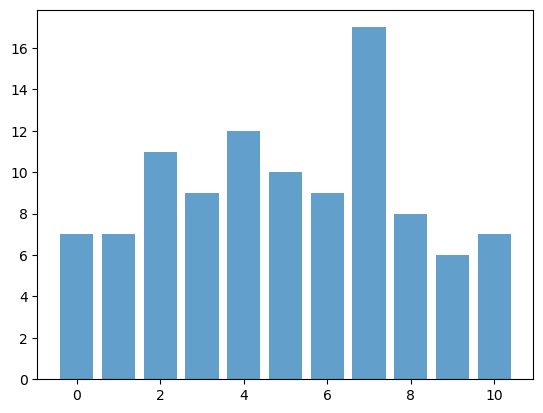

In [21]:
# Step 3: Profiling Segments
# Segment profile plot for the solution for the Electric Vehicles Dataset
k6 = KMeans(n_clusters=11)
k6.fit(pca_evdf)
l6 = k6.predict(pca_evdf)
x = range(11)
height = []
for i in range(11):
    height.append(sum(l6 == i))
plt.bar(x, height, alpha=0.7);
plt.show()

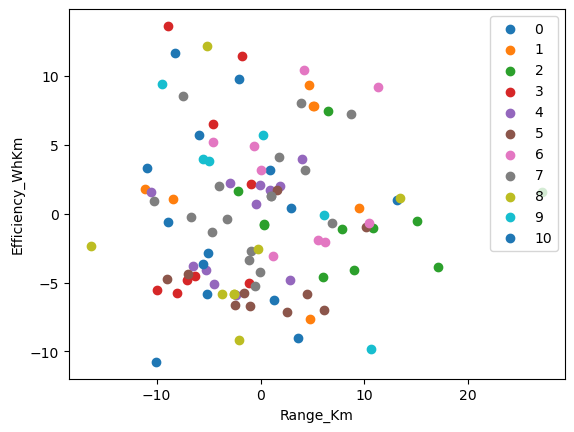

In [22]:
for i in range(11):
    temp = pca_evdf[['Range_Km', 'Efficiency_WhKm']][l6 == i]
    plt.scatter(temp['Range_Km'], temp['Efficiency_WhKm'], label=i)
plt.xlabel('Range_Km')
plt.ylabel('Efficiency_WhKm')
plt.legend()
plt.show()

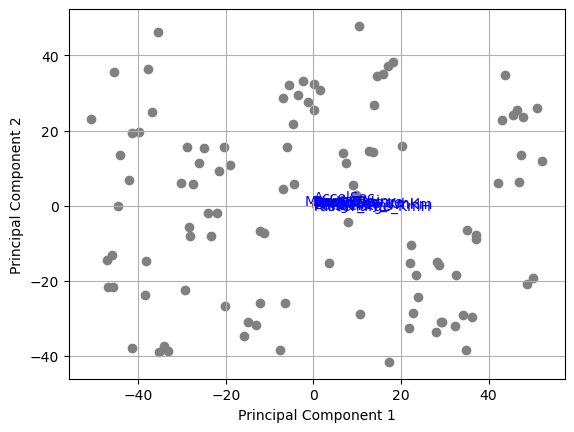

In [23]:
# Segment separation plot using principal components 1 and 2 for the Electric Vehicles Dataset
plt.scatter(evdata_pca[:, 0], evdata_pca[:, 1], color='grey', label='Data Points')
for i in range(len(pca.components_)):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], color='red', alpha=0.75, linewidth=1, head_width=0.1, label=f'PC{i + 1} Axis')
for i, column_name in enumerate(evdata.columns[0:11]):
    plt.text(-pca.components_[0, i] * 2, -pca.components_[1, i] * 2, column_name, color='blue')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

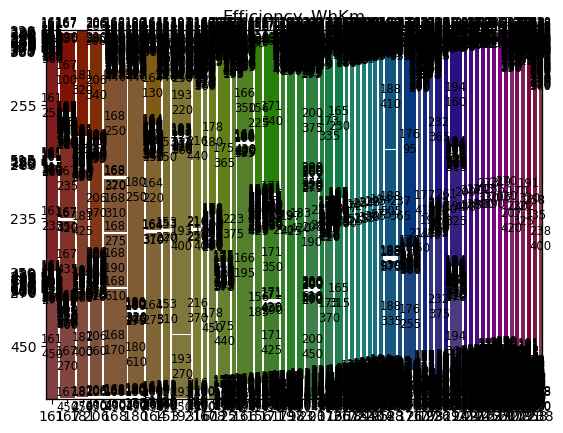

In [24]:
# Step 4: Describing Segments
# Shaded mosaic plot for cross-tabulation of segment membership and Efficiency_WhKm for the Electric Vehicles Dataset
from statsmodels.graphics.mosaicplot import mosaic
data = {
    'Efficiency_WhKm': evdata.Efficiency_WhKm,
    'Range_Km': evdata.Range_Km
}
mosaic1 = pd.DataFrame(data)
mosaic(mosaic1,['Efficiency_WhKm', 'Range_Km'], title='Efficiency_WhKm')
plt.show()

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


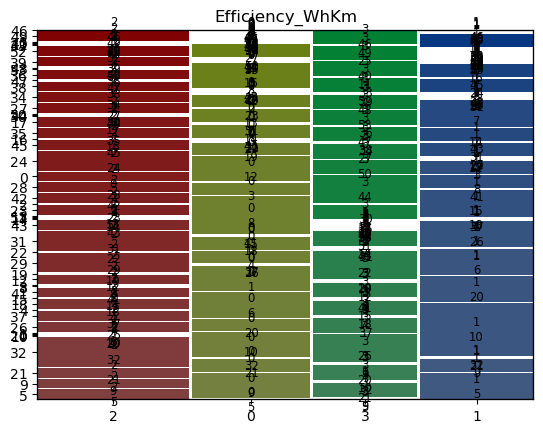

In [25]:
# Shaded mosaic plot for cross-tabulation of segment membership and Efficiency_WhKm for the Electric Vehicles Dataset
kmeans = KMeans(n_clusters=4)
dataset = evdata.iloc[:, :].apply(lambda x: LabelEncoder().fit_transform(x))
kmeans.fit(dataset)
dataset['cluster'] = kmeans.labels_
mosaic(data=dataset, index=['cluster', 'Efficiency_WhKm'], title='Efficiency_WhKm')
plt.show()

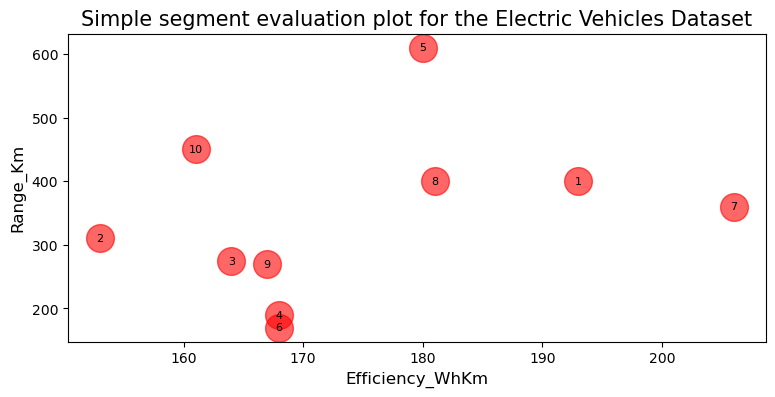

In [26]:
k4 = [273, 256, 232, 222, 209, 194, 180, 172, 165, 153]
customers = pd.DataFrame({'Range_Km': [450, 270, 400, 360, 170, 610, 190, 275, 310, 400],
                           'RapidCharge': ['Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes'],
                           'Efficiency_WhKm': [161, 167, 181, 206, 168, 180, 168, 164, 153, 193]})

Efficiency_WhKm_mean = customers.groupby(k4)['Efficiency_WhKm'].mean()
Range_Km_mean = customers.groupby(k4)['Range_Km'].mean()
RapidCharge_mean = customers.groupby(k4)['RapidCharge'].apply(lambda x: (x == 'Yes').mean())

Efficiency_WhKm_values = Efficiency_WhKm_mean.values
Range_Km_values = Range_Km_mean.values
RapidCharge_values = RapidCharge_mean.values

plt.figure(figsize=(9, 4))
plt.scatter(Efficiency_WhKm_values, Range_Km_values, s=400, c='red', alpha=0.6)  # 's' is marker size
plt.title("Simple segment evaluation plot for the Electric Vehicles Dataset", fontsize=15)
plt.xlabel("Efficiency_WhKm", fontsize=12)
plt.ylabel("Range_Km", fontsize=12)

for i, txt in enumerate(range(1, len(Efficiency_WhKm_values) + 1)):
    plt.text(Efficiency_WhKm_values[i], Range_Km_values[i], str(txt), fontsize=8, ha='center', va='center')

plt.show()